# How Severe Will an Airplane Crash Be?




## Introduction and Description

This airline accident dataset includes 10000 observations and 12 columns, including those listed below.  The data represents recorded airline accidents, the factors that were present during those accidents, and then it rates the severity of each incident.  We would like to use a decision tree algorithm to determine the predicted severity of accidents based upon criteria such as safety score, turbulence, and adverse weather.

This dataset comes from [Vignesh Venkat on kaggle ](https://www.kaggle.com/vigneshvenkat/airplane)

## Exploratory Data Analysis

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization using seaborn

In [2]:
df1 = pd.read_csv("project2/train.csv")

### Explore the basic elements and structure of the dataset

In [3]:
df1.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [4]:
df1.shape  # How many rows and columns

(10000, 12)

In [5]:
df1.columns  # What the column names are

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Accident_ID'],
      dtype='object')

In [6]:
df1.info()  # What kind of data is in this dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Severity                 10000 non-null  object 
 1   Safety_Score             10000 non-null  float64
 2   Days_Since_Inspection    10000 non-null  int64  
 3   Total_Safety_Complaints  10000 non-null  int64  
 4   Control_Metric           10000 non-null  float64
 5   Turbulence_In_gforces    10000 non-null  float64
 6   Cabin_Temperature        10000 non-null  float64
 7   Accident_Type_Code       10000 non-null  int64  
 8   Max_Elevation            10000 non-null  float64
 9   Violations               10000 non-null  int64  
 10  Adverse_Weather_Metric   10000 non-null  float64
 11  Accident_ID              10000 non-null  int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


This output shows that the majority of the entries are either integers or floats.  What will be our target column --- Severity --- is the only exception.  It's an object, which probably means that it is a string.  We can confirm that by looking at just the entries in that column.

In [7]:
df1["Severity"].head(10)

0                  Minor_Damage_And_Injuries
1                  Minor_Damage_And_Injuries
2          Significant_Damage_And_Fatalities
3    Significant_Damage_And_Serious_Injuries
4          Significant_Damage_And_Fatalities
5                  Minor_Damage_And_Injuries
6                  Highly_Fatal_And_Damaging
7                  Minor_Damage_And_Injuries
8                  Highly_Fatal_And_Damaging
9    Significant_Damage_And_Serious_Injuries
Name: Severity, dtype: object

### Verify there are no missing entries in the dataset

In [8]:
df1.isna().sum()  # Add up the number of missing numerical entries in the dataset

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

The zeros indicate that there are no "Not a number" values.  For the "Severity" column, that doesn't mean there are no blank entries, however, since none of the entries are numbers.  We know from the info entry above, however, that there are 10000 non-null entries, which means there are no blank entries in that column.

## Exploratory Data Visualization

We can begin the visual examination of our data by looking at histograms or barplots of each of our variables.

In order to most efficiently accomplish this, a little research found a starter code on kaggle that enables us to plot each distribution together with one function.  Shameless copying (but of course with [citation](https://www.kaggle.com/kerneler/starter-airplane-05618a1a-0)) of the code for that function enables us to do this.

In [9]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

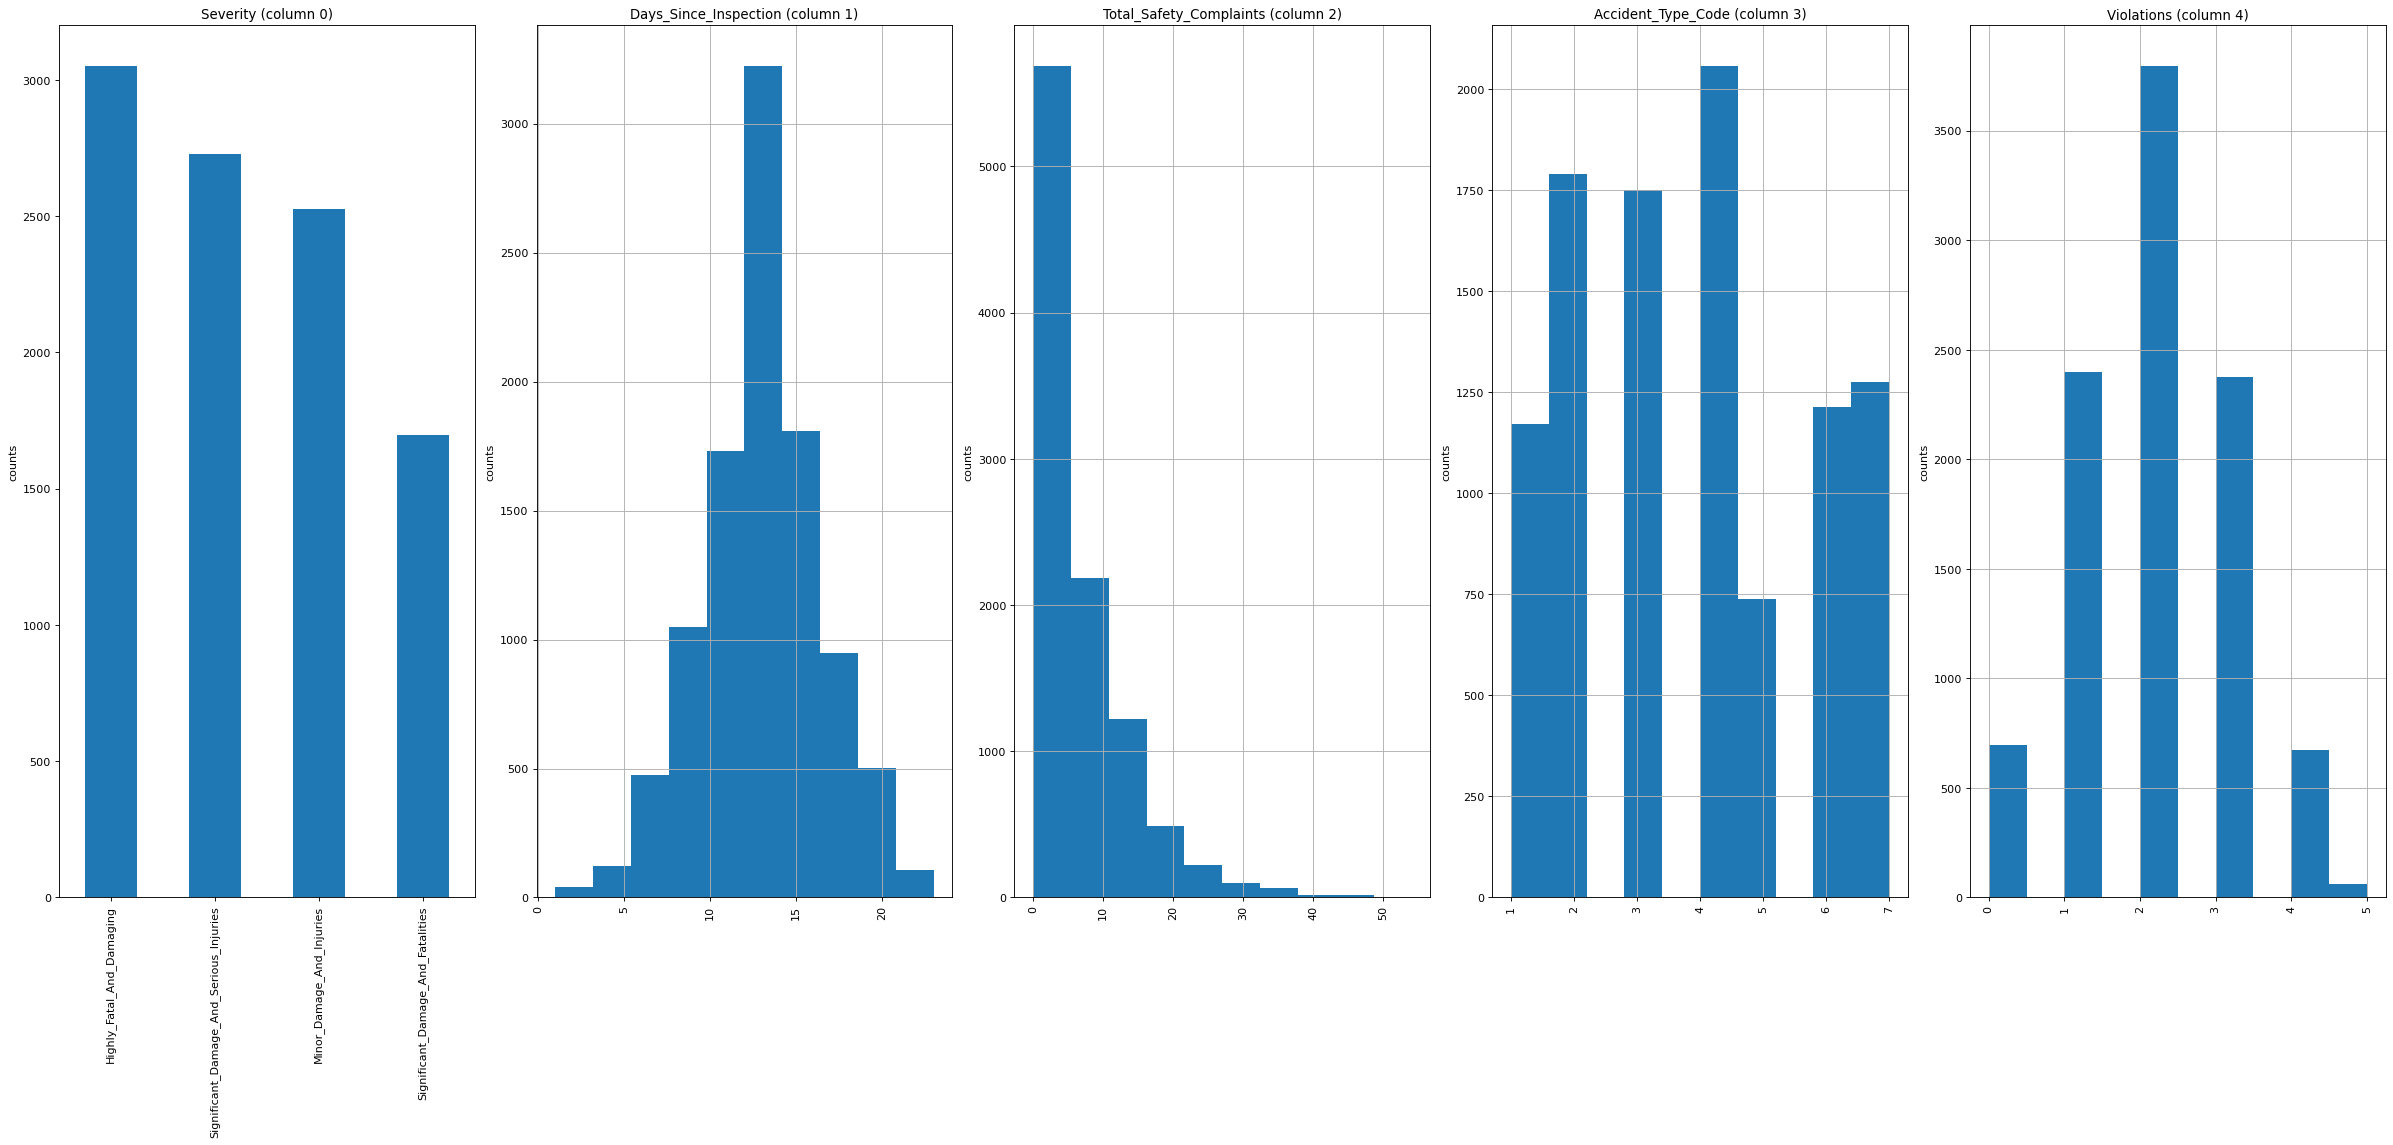

In [10]:
plotPerColumnDistribution(df1, 10, 5)

This shows us the distribution of those variables that have between one and 50 unique values.  For our purposes, the first graph is the most interesting.  It shows an interesting distribution of the severity of the accidents, and the fact that we only have four, which should help us with our decision tree analysis.  Closer examination raises some questions about the entries, however.  What is the difference between "Significant damage and fatalities" and "highly fatal and damaging"?  In the real world, this would be problematic, but for the purpose of just practicing decision trees, this is not problematic.

Before we apply any sort of machine learning model to our data, we need to check to see which sort of model would be most appropriate for our data.  If we were doing a simple one variable-one output comparison, a scatterplot would be the obvious choice.  Since we have several variables, however, we need to do a number of scatterplots.  The easiest way to do this is with a sns.pairplot.

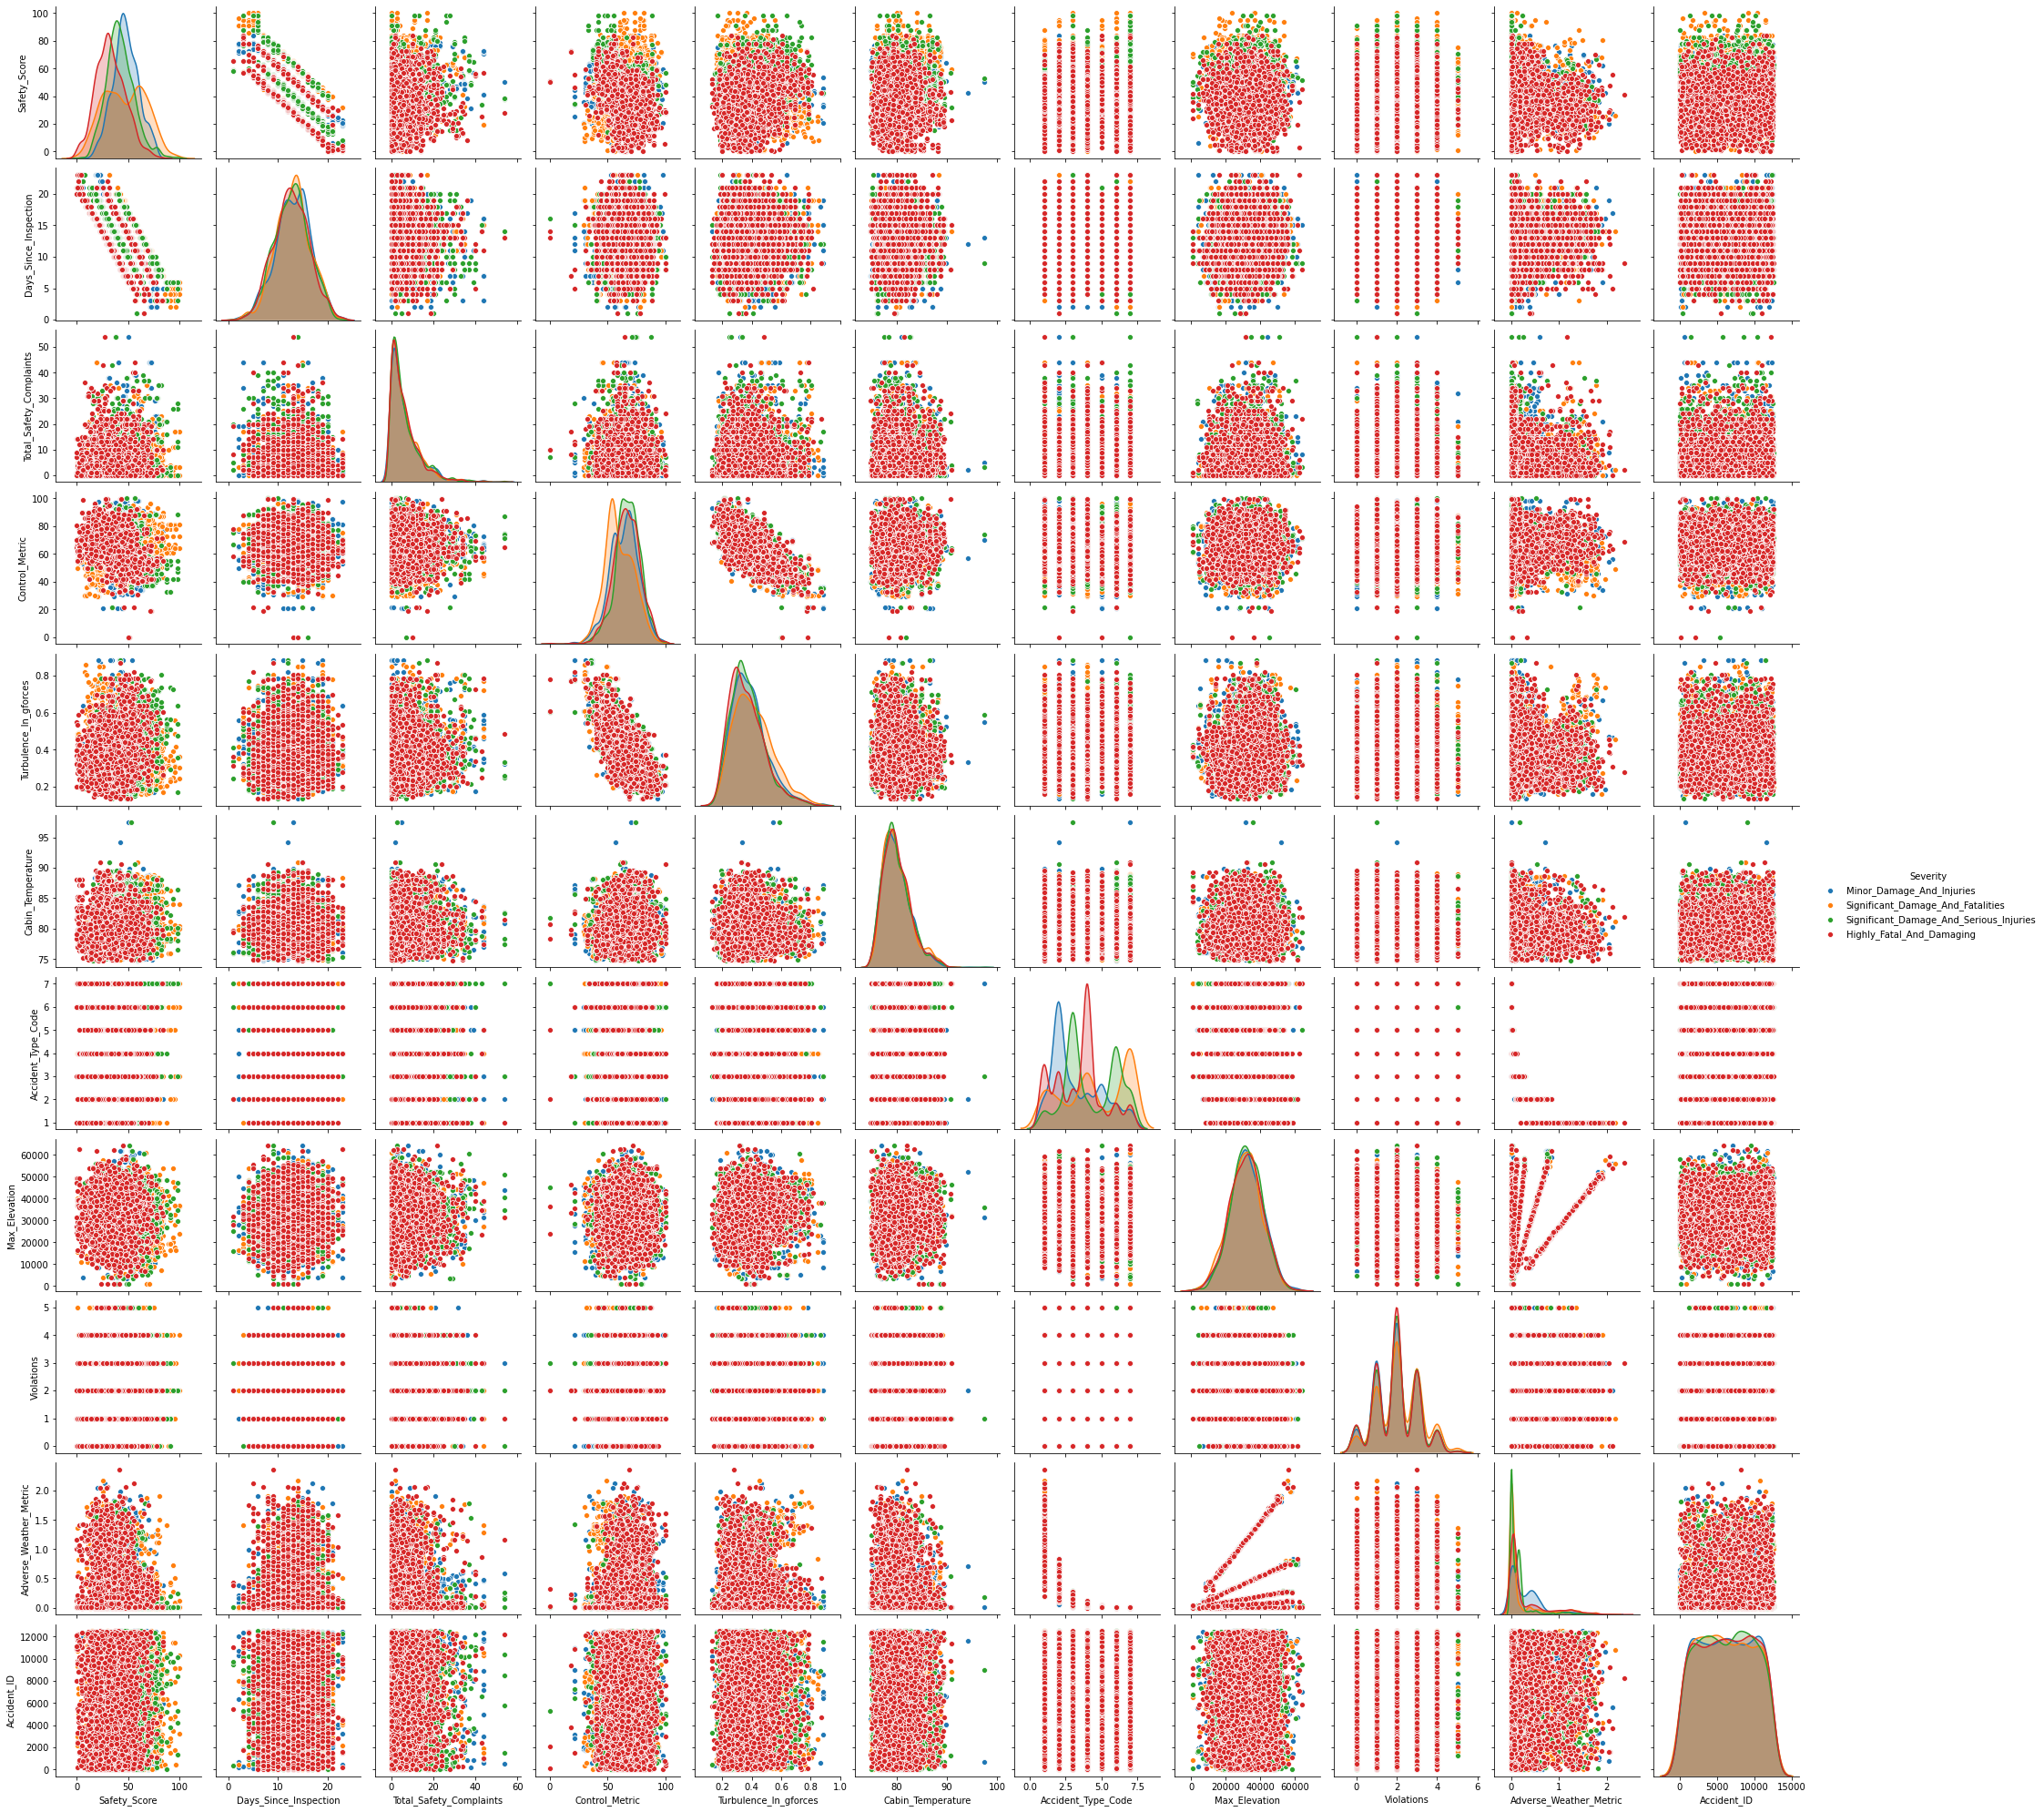

In [11]:
sns.pairplot(df1, hue = "Severity", height = 2.5)

No particular correlation between our control metric ("Severity") and another variable jumps out from this plot, though there does seem to be a negative correlation between severity and turbulence.  That negative correlation could be due, however, to the way that the "severity" variable is encoded right now.  So we will assume there is some sort of relationship, though not necessarily a negative correlation.  (There are two other apparent relationships in these plots, and that is between elevation and adverse weather and days since inspection and safety score.)

To further explore if there is a relationship between "severity" and turbulence, we will plot just those two variables.

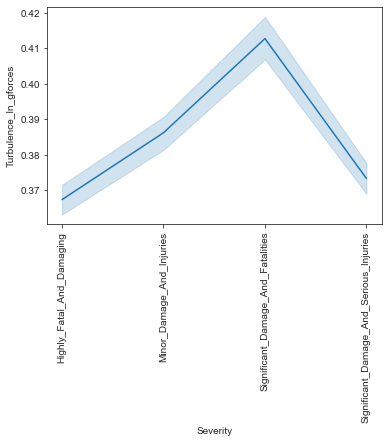

In [12]:
sns.set_style("whitegrid")
sns.set_style("ticks")
g = sns.lineplot(x = df1["Severity"], y =df1["Turbulence_In_gforces"])
plt.xticks(rotation=90)

plt.show(g)

Incongruously, it seems that accidents that cause heavy fatalities have the lowest level of turbulence.  A bar plot might clarify this further.

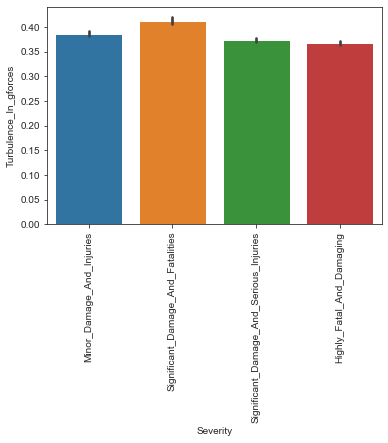

In [13]:
sns.set_style("whitegrid")
sns.set_style("ticks")
g = sns.barplot(x = df1["Severity"], y =df1["Turbulence_In_gforces"])
plt.xticks(rotation=90)

plt.show(g)

Yes, the difference is not significant, but highly fatal accidents are the least likely to involve turbulence.  (Though, anecdotally, if you think about stories of plane crashes and turbulence events, that is not shocking.  Most turbulence does not cause planes to crash, but does cause passengers who are not belted in to fly around the cabin and receive injuries.)

Which raises the question, does *anything* correlate with severity?

## Correlation Heatmap

In [14]:
corr = df1.corr()  # Calculate correlation coefficient for our dataframe

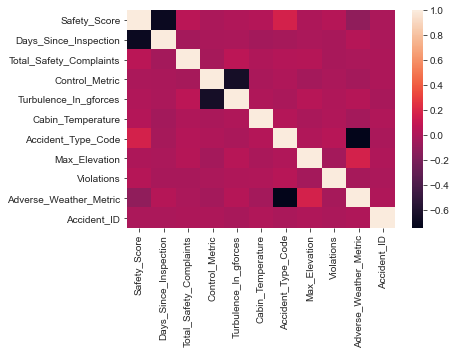

In [15]:
# plot the correlation coefficients in a heatmap
sns.set_palette("magma")
sns.heatmap(corr)


There does not appear to be any particularly high correlation between our control metric ("severity") and any other factor.  There is a negative correlation between our control metric and turbulence (though we have already explored that above).  Again, we see a strong negative correlation between accident type and adverse weather and days since inspection and safety score.  There is also a slight positive correlation between max elevation and adverse weather (pilots often fly over bad weather).

## Applying a decision tree

In [16]:
# Import the required libraries --- we will use the mean squared error to test our accuracy
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error as MSE

X = df1.drop(['Severity'], axis=1)


### Encoding the categorical target variable

We are trying to predict a categorical variable (which is a string object), so we will need to encode it into numbers so the algorithm can predict it.

In [17]:
severity_cat = df1[["Severity"]]

In [18]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
y = ordinal_encoder.fit_transform(severity_cat)
y[:10]



array([[1.],
       [1.],
       [2.],
       [3.],
       [2.],
       [1.],
       [0.],
       [1.],
       [0.],
       [3.]])

In [19]:
# get the list of categories
ordinal_encoder.categories_

[array(['Highly_Fatal_And_Damaging', 'Minor_Damage_And_Injuries',
        'Significant_Damage_And_Fatalities',
        'Significant_Damage_And_Serious_Injuries'], dtype=object)]

### Creating a test set

In order to verify that our model is working, we will need to set aside a part of our data as a test set.  We will set aside 20 percent.

In [20]:
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,random_state=99)

### Create the decision tree classifier (with node selection based upon entropy)

In [21]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=99)

### Fit the decision tree to our training dataset

In [22]:

clf.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', random_state=99)

### Test the model with our test dataset, and print the accuracy score

In [23]:
y_pred= clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.926

With 92 percent accuracy, our decision tree predicts the category of severity that the accident will be.

## Plot the Decision Tree

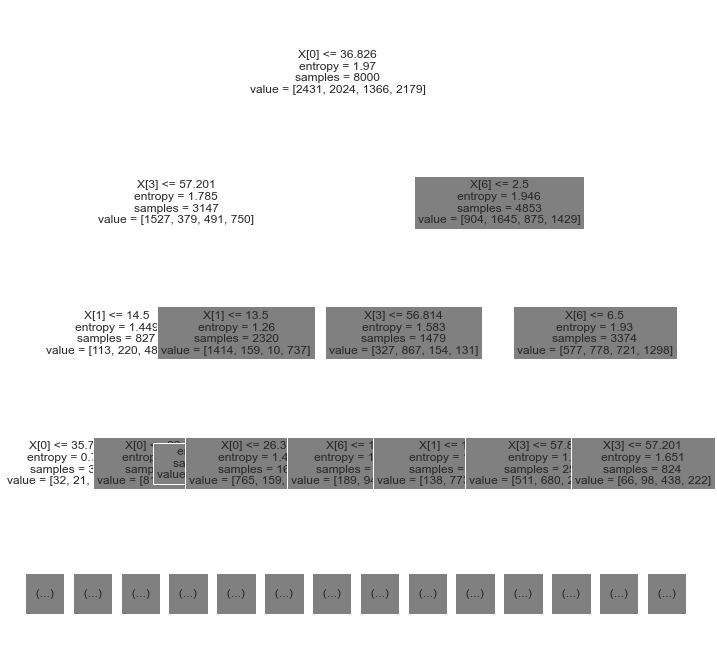

In [24]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(decision_tree=clf, max_depth= 3,fontsize=12);

## Interpretation

According to our accuracy test results above, the decision tree model can predict with 92 percent accuracy based upon the 11 variables what type of severity an accident will have.  Frankly, that is surprising, given the lack of clear correlation with any of the variables on their own. 